In [1]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [3]:
class StrToBytes:
    def __init__(self, fileobj):
        self.fileobj = fileobj
    def read(self, size):
        return self.fileobj.read(size).encode()
    def readline(self, size=-1):
        return self.fileobj.readline(size).encode()

In [14]:
dictionary = pickle.load(StrToBytes(open("../final_project/final_project_dataset_modified.pkl", "r")))


In [15]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
data

array([[ 600000.,  365788.],
       [1200000.,  267102.],
       [ 350000.,  170941.],
       [1500000.,  243293.],
       [ 325000.,  267093.],
       [2600000.,  370448.],
       [1150000.,  374125.],
       [ 400000.,  197091.],
       [ 850000.,  248546.],
       [ 700000.,  257486.],
       [1200000.,  288542.],
       [1100000.,  251654.],
       [ 250000.,  288558.],
       [ 850000.,  357091.],
       [3100000.,  271442.],
       [2000000.,  304110.],
       [ 250000.,  187922.],
       [1000000.,  213625.],
       [ 700000.,  249201.],
       [ 700000.,  231330.],
       [ 200000.,  182245.],
       [1700000.,  211788.],
       [ 800000.,  224305.],
       [1000000.,  273746.],
       [8000000.,  339288.],
       [ 425000.,  210500.],
       [ 750000.,  272880.],
       [ 650000.,  269076.],
       [1500000.,  428780.],
       [ 200000.,  211844.],
       [ 600000.,  206121.],
       [3000000.,  510364.],
       [1100000.,  365038.],
       [3000000.,  365163.],
       [ 10000

In [16]:
target, features = targetFeatureSplit( data )

In [17]:
### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test =  train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train,target_train)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(feature_train,target_train))

[1.97017287]
662220.417601581
0.04164573226747781


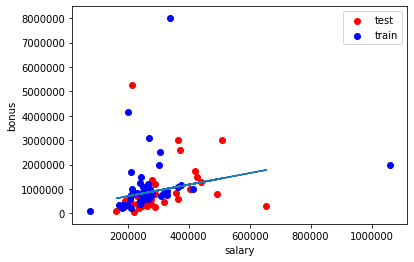

In [23]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")



#reg.fit(feature_test, target_test)
### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [15]:
print(reg.coef_)
print(reg.intercept_)

[0.2671367]
1044304.063758236


In [16]:
print(reg.score(feature_test,target_test))

0.10891175736247372
